In [1]:
from IPython.display import IFrame
IFrame("teoria.pdf", width=600, height=300)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [6]:
from sklearn.svm import SVC
classifier = SVC(kernel="rbf", random_state=0, verbose = True)
classifier.fit(X_train, y_train)

[LibSVM]

SVC(random_state=0, verbose=True)

In [7]:
y_pred = classifier.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(y_test, y_pred)

<AxesSubplot:>

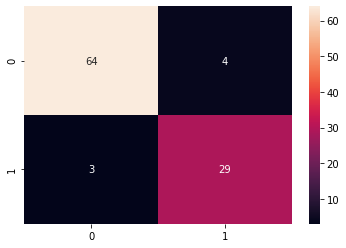

In [9]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.93

In [11]:
from pycm import *
cm = ConfusionMatrix(y_test, y_pred,digit=5)
cm.class_stat

{'TPR': {0: 0.9411764705882353, 1: 0.90625},
 'TNR': {0: 0.90625, 1: 0.9411764705882353},
 'PPV': {0: 0.9552238805970149, 1: 0.8787878787878788},
 'NPV': {0: 0.8787878787878788, 1: 0.9552238805970149},
 'FNR': {0: 0.05882352941176472, 1: 0.09375},
 'FPR': {0: 0.09375, 1: 0.05882352941176472},
 'FDR': {0: 0.04477611940298509, 1: 0.12121212121212122},
 'FOR': {0: 0.12121212121212122, 1: 0.04477611940298509},
 'ACC': {0: 0.93, 1: 0.93},
 'F1': {0: 0.9481481481481482, 1: 0.8923076923076924},
 'MCC': {0: 0.8406923585263667, 1: 0.8406923585263667},
 'BM': {0: 0.8474264705882353, 1: 0.8474264705882353},
 'MK': {0: 0.8340117593848937, 1: 0.8340117593848937},
 'PLR': {0: 10.03921568627451, 1: 15.406249999999996},
 'NLR': {0: 0.06490872210953348, 1: 0.099609375},
 'DOR': {0: 154.66666666666663, 1: 154.66666666666663},
 'TP': {0: 64, 1: 29},
 'TN': {0: 29, 1: 64},
 'FP': {0: 3, 1: 4},
 'FN': {0: 4, 1: 3},
 'POP': {0: 100, 1: 100},
 'P': {0: 68, 1: 32},
 'N': {0: 32, 1: 68},
 'TOP': {0: 67, 1: 33}

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


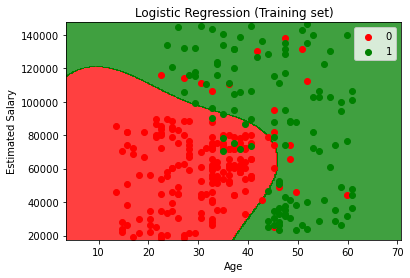

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


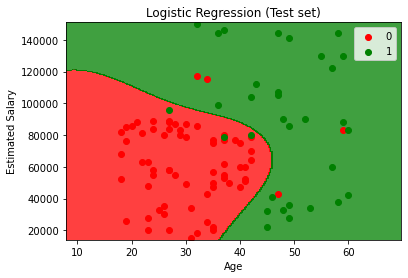

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()